# Gradient Boosting Regressor Learning Model

We first start with pulling the data from the csv file

In [56]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline


data = pd.read_csv("socal2.csv")
data.head()

,image_id,street,citi,n_citi,bed,bath,sqft,price
0,0,1317 Van Buren Avenue,"Salton City, CA",317,3,2.0,1560,201900
1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500
2,2,2304 Clark Road,"Imperial, CA",152,3,1.0,800,273950
3,3,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000
4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100


In [57]:
data.shape

(15474, 8)

In [58]:
data.describe()

,image_id,n_citi,bed,bath,sqft,price
count,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,1.547400e+04
mean,7736.500000,216.597518,3.506398,2.453251,2173.913209,7.031209e+05
std,4467.103368,112.372985,1.034838,0.958742,1025.339617,3.769762e+05
min,0.000000,0.000000,1.000000,0.000000,280.000000,1.950000e+05
25%,3868.250000,119.000000,3.000000,2.000000,1426.000000,4.450000e+05
50%,7736.500000,222.500000,3.000000,2.100000,1951.000000,6.390000e+05
75%,11604.750000,315.000000,4.000000,3.000000,2737.750000,8.349750e+05
max,15473.000000,414.000000,12.000000,36.000000,17667.000000,2.000000e+06


Use the correlation matrix to find any relationships between features in respect to the value you are focusing on

In [59]:
corr_matrix = data.corr()
top_corr_feats = corr_matrix.index
corr_matrix['price'].sort_values(ascending=False)

price       1.000000
sqft        0.583457
bath        0.477735
bed         0.348711
image_id    0.094821
n_citi      0.047169
Name: price, dtype: float64

It appears that the square foot acreage has the strongest correlation with the price column, as shown by the heatmap below:

<AxesSubplot:>

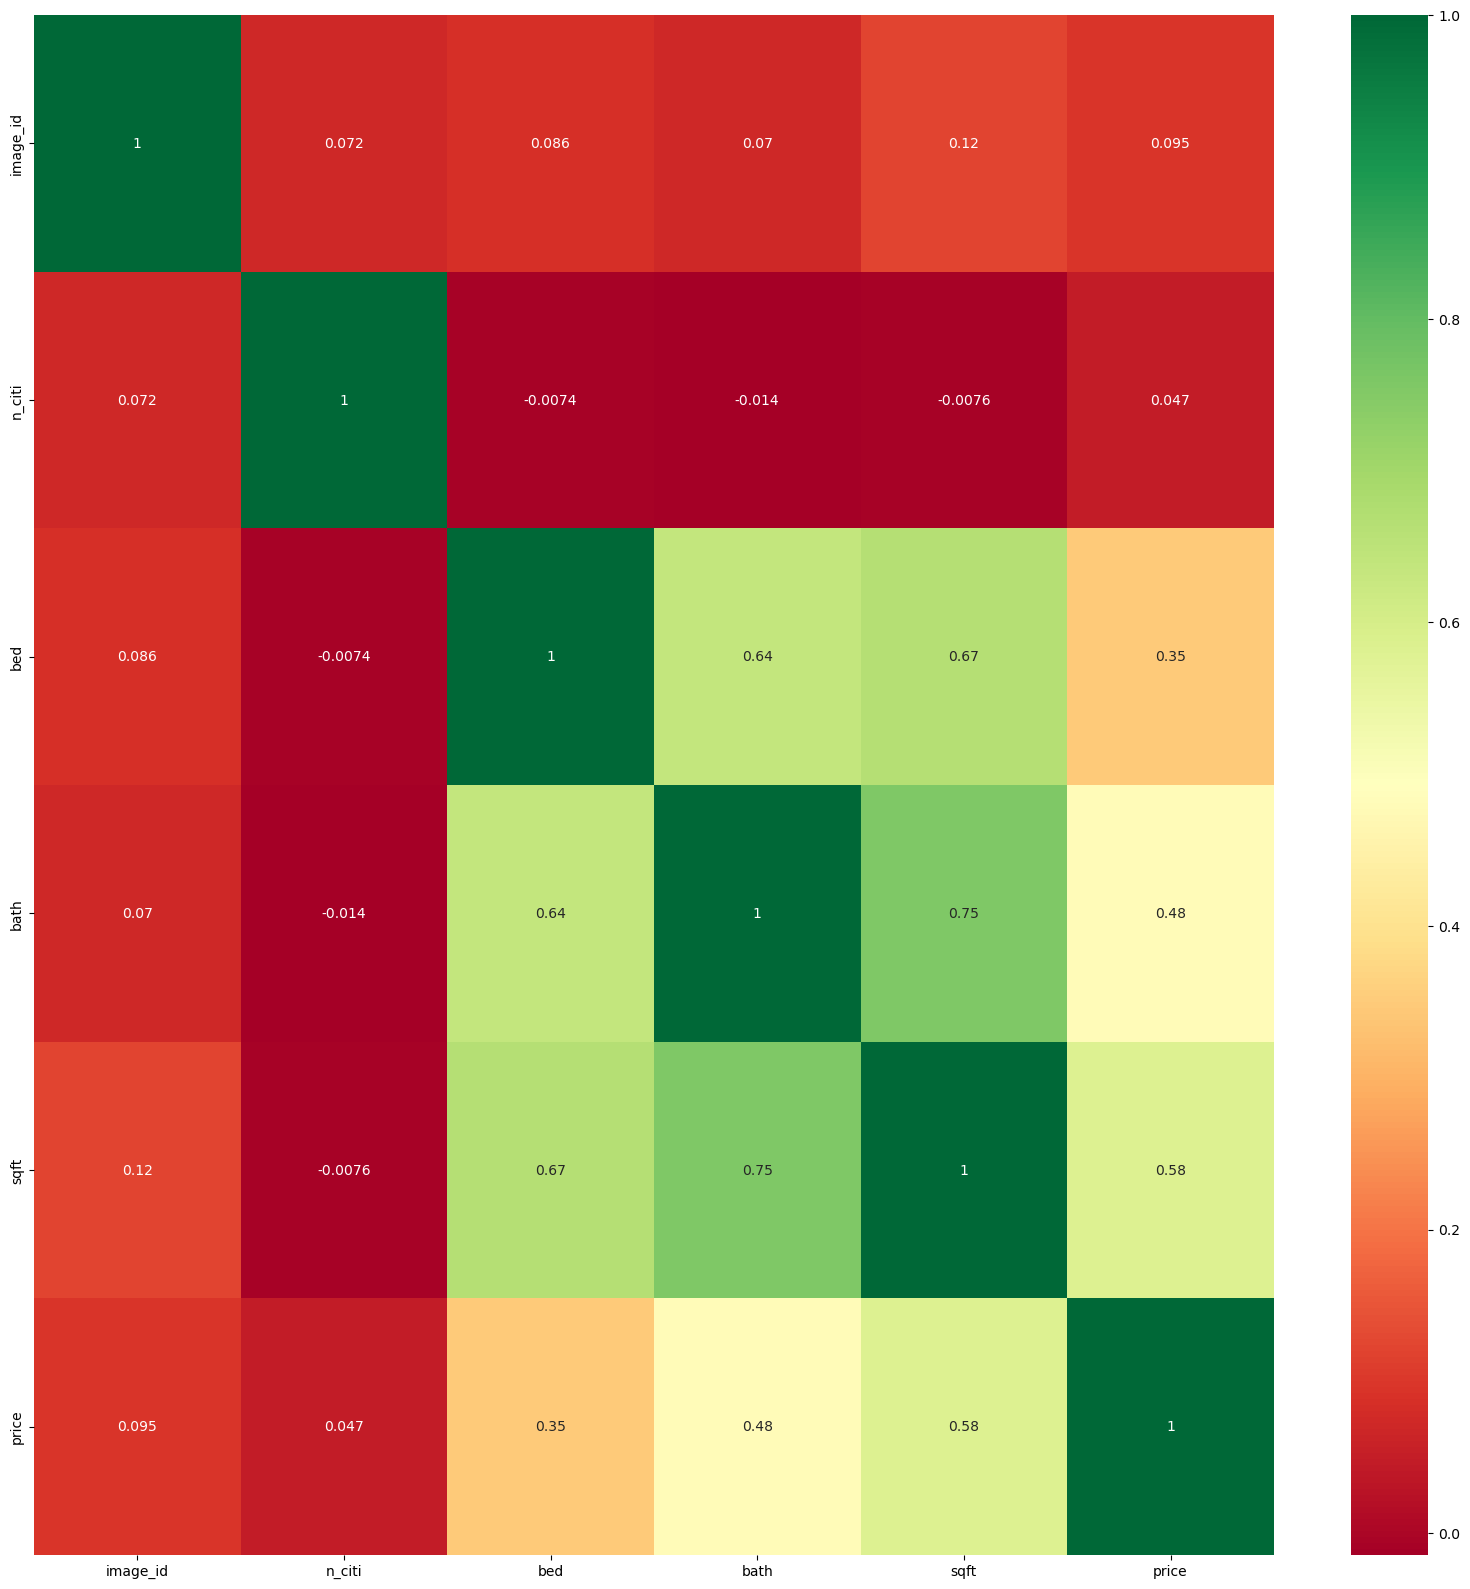

In [60]:
plt.figure(figsize=(20,20))
sns.heatmap(data[top_corr_feats].corr(), annot=True, cmap='RdYlGn')

In [61]:
data['sqft'].value_counts()

1200    74
1100    61
1600    59
1440    56
1300    53
        ..
3246     1
2437     1
3025     1
4032     1
4457     1
Name: sqft, Length: 3571, dtype: int64

<AxesSubplot:xlabel='sqft', ylabel='price'>

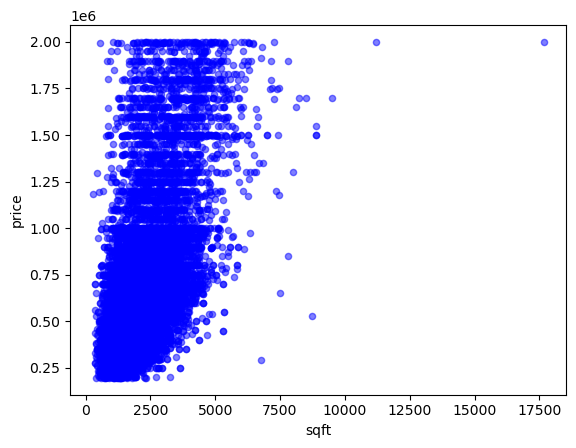

In [62]:
data.plot(kind='scatter', x='sqft', y='price', color='b', alpha=0.5)

Lets train the data with the Gradient Boosting Regressor Model

In [63]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='median') # filling in the missing values using the median
imputer.fit(housing_num)
imputer.statistics_
housing_num.median().values

array([7.7365e+03, 2.2250e+02, 3.0000e+00, 2.1000e+00, 1.9510e+03,
       6.3900e+05])

In [64]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories ='auto')
housing_cat_1Hot = enc.fit_transform(housing_cat)
housing_cat_1Hot

<15474x12816 sparse matrix of type '<class 'numpy.float64'>'
	with 30948 stored elements in Compressed Sparse Row format>

In [65]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self , feature_names):
        self._feature_names = feature_names
        
    def fit(self, X, y = None):
        return self
        
    def transform(self, X , y =None):
        return X[self._feature_names]

In [66]:
### Create a pipeline  then change the label encoder into one hot encoders
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

housing_cat = data.select_dtypes(include = ['object'])
housing_num = data.select_dtypes(include = ['float', 'int64'])
housing_pr = full_pipeline.fit_transform(data)

num_attributes = list(housing_num)
categorical_atrributes = list(housing_cat)

num_pipeline = Pipeline( steps = [
    ('selector', FeatureSelector(num_attributes)),
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler()),
])
categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='most_frequent')),
('imput', OneHotEncoder(handle_unknown='ignore'))
])


full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', categorical_transformer)
])

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=15000, max_depth=4, min_samples_leaf=15, min_samples_split=10, learning_rate=0.01, loss='huber', random_state=5)

gbr.fit(housing_pr, data['price'])
#This step takes especially long given the data 

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=4,
                          min_samples_leaf=15, min_samples_split=10,
                          n_estimators=15000, random_state=5)

In [70]:
from sklearn.metrics import mean_squared_error
housing_predictions = gbr.predict(housing_pr )
gbrt_mse = mean_squared_error(data['price'], housing_predictions)
gbrt_rmse = np.sqrt(gbrt_mse)
gbrt_rmse

In [ ]:
some_data = housing_train.iloc[:5]
some_labels = data['price'].iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
predictions = gbr.predict(some_data_prepared)
print("Predictions:\t" ,predictions )

In [ ]:
diff_in_labels = some_labels - predictions
print("The difference between prediction and the actual prices:\t", diff_in_labels )

In [ ]:
gbrt.score(housing_pr , housing_label)